In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Sample dataset with both numerical and categorical data
data = {
    'age': [22, 35, 26, 27, 32],
    'income': ['high', 'medium', 'low', 'medium', 'high'],
    'student': ['no', 'yes', 'yes', 'no', 'yes'],
    'credit_rating': ['fair', 'excellent', 'fair', 'excellent', 'fair'],
    'buys_computer': ['no', 'yes', 'yes', 'no', 'yes']
}

In [13]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [14]:
df

,age,income,student,credit_rating,buys_computer
0,22,high,no,fair,no
1,35,medium,yes,excellent,yes
2,26,low,yes,fair,yes
3,27,medium,no,excellent,no
4,32,high,yes,fair,yes


In [15]:
# Split the dataset into features and target
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

In [16]:
# Separate categorical and numerical columns
categorical_cols = ['income', 'student', 'credit_rating']
numerical_cols = ['age']

In [17]:
# OneHotEncode the categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid dummy variable trap
X_encoded = encoder.fit_transform(X[categorical_cols])

In [18]:
# Combine numerical and encoded categorical features
X_combined = np.hstack([X[numerical_cols].values, X_encoded])

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [20]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()

In [21]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Make predictions
y_pred = clf.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [24]:
# Visualize decision tree (optional)
from sklearn import tree
import matplotlib.pyplot as plt

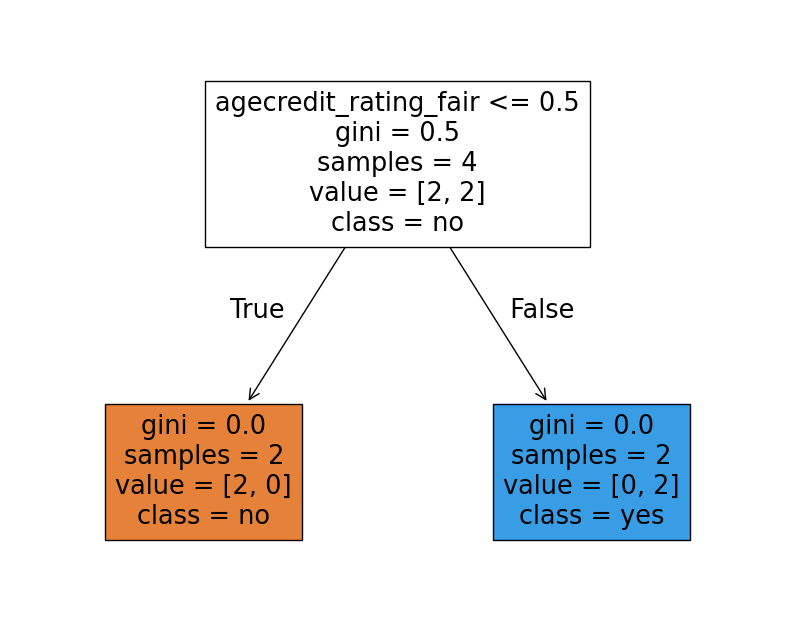

In [25]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=numerical_cols + encoder.get_feature_names_out(categorical_cols), 
               class_names=['no', 'yes'], filled=True)
plt.show()


In [30]:

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Define the dataset
data = {
    'Age Group': ['Young', 'Young', 'Young', 'Middle', 'Old', 'Old', 'Middle', 'Middle', 'Young', 'Old', 'Old'],
    'Income Level': ['Low', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Medium'],
    'Credit Rating': ['Fair', 'Fair', 'Good', 'Good', 'Fair', 'Fair', 'Good', 'Good', 'Good', 'Good', 'Fair'],
    'Buy Car': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes']
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Separating features and target
X = df.drop(columns='Buy Car')
y = df['Buy Car']

# Encoding categorical features into numerical values
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
# Splitting data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



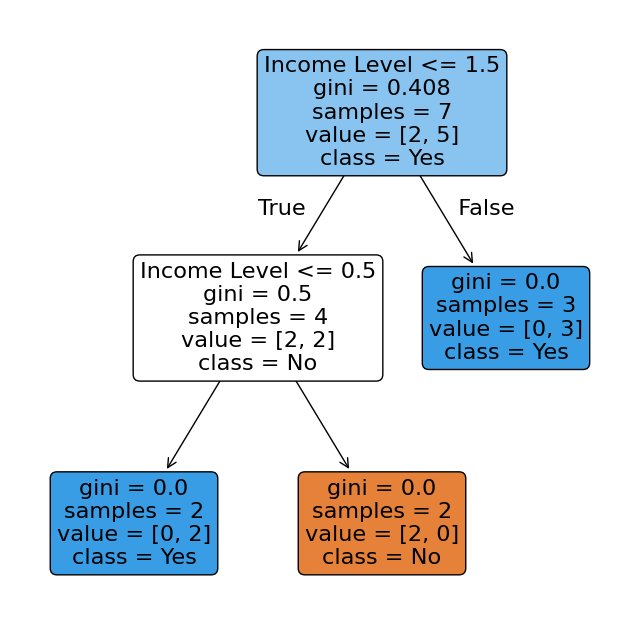

In [34]:
# Visualizing the Decision Tree
plt.figure(figsize=(8,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()